In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import pandas as pd

# Path to the CSV file
file_path = "data/arduino_data_2024-11-24_11-58-08.csv"  # Replace 'yourfilehere.csv' with your actual filename

try:
    # Load data
    data = pd.read_csv(file_path)

    # Remove the first row (assuming it's erroneous)
    data = data.iloc[1:].reset_index(drop=True)

    # Filter rows with valid comma-separated structure (exactly 2 commas for 3 elements)
    data = data[data["Data"].str.count(",") == 2]

    # Split the "Data" column into three components: "Time (ms)", "Data", "Voltage"
    data[["Time (ms)", "Data", "Voltage"]] = data["Data"].str.split(",", expand=True)

    # Convert the new columns to appropriate numeric types
    data["Time (ms)"] = pd.to_numeric(data["Time (ms)"], errors="coerce")
    data["Data (ADC)"] = pd.to_numeric(data["Data"], errors="coerce")
    data["Voltage"] = pd.to_numeric(data["Voltage"], errors="coerce")

    # Drop the "Time (s)" column
    data = data.drop(columns=["Time (s)"])
    # Drop rows with NaN values (if any remain after conversion)
    data.dropna(subset=["Time (ms)", "Data (ADC)", "Voltage"], inplace=True)
    columns_titles = ["Data (ADC)","Time (ms)", "Voltage"]
    data=data.reindex(columns=columns_titles)

    # Display the cleaned dataset
    print("First few rows of the cleaned dataset:")
    display(data.head())  # Use display() for better formatting in Jupyter



except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.EmptyDataError:
    print("The file is empty. Please check your data file.")
except KeyError as e:
    print(f"Column not found in the CSV: {e}")
except ValueError as e:
    print(f"Error processing data: {e}")


First few rows of the cleaned dataset:


,Data (ADC),Time (ms),Voltage
0,145,40,7.09
1,150,60,7.33
2,150,80,7.33
3,152,100,7.43
4,159,120,7.77


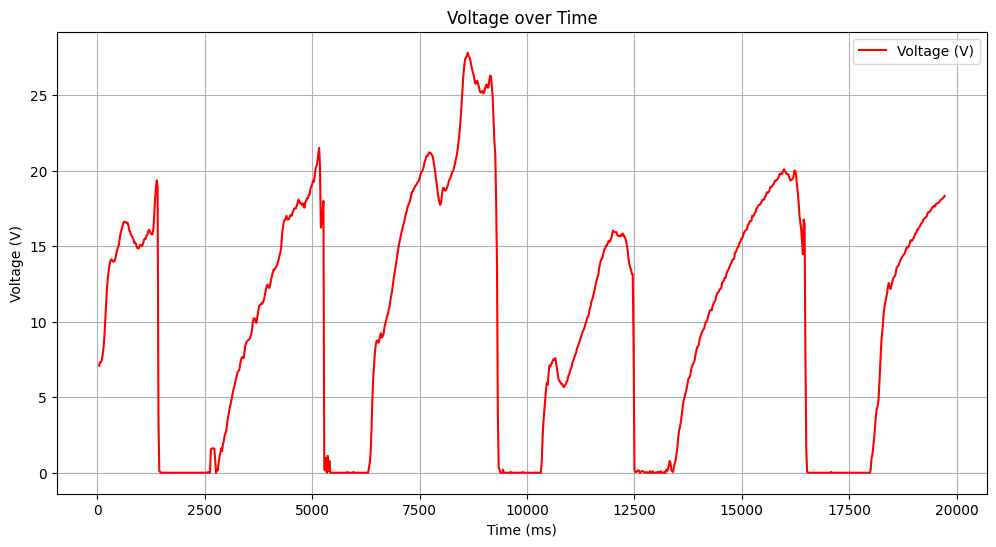

In [48]:
try:
    # Plotting Voltage vs Time
    plt.figure(figsize=(12, 6))

    # Plot Voltage over Time
    plt.plot(data["Time (ms)"], data["Voltage"], label="Voltage (V)", color="red", linestyle="-")

    # Adding titles and labels
    plt.title("Voltage over Time")
    plt.xlabel("Time (ms)")
    plt.ylabel("Voltage (V)")
    plt.legend(loc="upper right")
    plt.grid(True)

    # Show the plot
    plt.show()

except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.EmptyDataError:
    print("The file is empty. Please check your data file.")
except KeyError as e:
    print(f"Column not found in the CSV: {e}")
except ValueError as e:
    print(f"Error processing data: {e}")
